## Setup

In [ ]:
import os

os.environ["KERAS_BACKEND"] = "tensorflow"

import re
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
import io
import ast
import pandas as pd


import tensorflow as tf
import keras
import pandas as pd
from keras import layers
from keras.applications import efficientnet
from keras.layers import TextVectorization

keras.utils.set_random_seed(111)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Download the dataset

We will be using the Rsicd dataset for this tutorial. This dataset comprises over
10,000 images, that are each paired with five different captions.

In [ ]:
# Path to the images
IMAGES_PATH = "/content/RSCID/rsicd_images"

# Desired image dimensions
IMAGE_SIZE = (299, 299)

# Vocabulary size
VOCAB_SIZE = 10000

# Fixed length allowed for any sequence
SEQ_LENGTH = 25

# Dimension for the image embeddings and token embeddings
EMBED_DIM = 512

# Per-layer units in the feed-forward network
FF_DIM = 512

# Other training parameters
BATCH_SIZE = 64
EPOCHS = 30
AUTOTUNE = tf.data.AUTOTUNE

## Preparing the dataset

In [ ]:
# preparing dataset for train.csv
# CSV file path
csv_file_path = '/content/drive/MyDrive/Colab Notebooks/dataset/rsicd/train.csv'

# Columns in the CSV
filename_column = 'filename'
image_data_column = 'image'

# Output directory for extracted images
output_directory = 'RSICD/'

# Load the CSV file
df = pd.read_csv(csv_file_path)

# Initialize an empty list to store valid captions
list_captions_train = []
text_data = []  # Initialize text_data
valid_indices = []

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    # Process the captions
    cap = row["captions"]
    cap = cap.replace("[", " ").replace("]", " ").replace("'", " ")
    list_captions = ["<start> " + element.strip() + " <end>" for element in re.split(r'[\n\.]', cap) if element.strip()]

    # Check if the list of captions has exactly 5 elements
    if len(list_captions) == 5:
        list_captions_train.append(list_captions)
        text_data.extend(list_captions)  # Append valid captions to text_data
        valid_indices.append(index)  # Store the index of valid rows

        # Process and save the image
        filename = row[filename_column]
        image_data = row[image_data_column]

        image = Image.open(io.BytesIO((ast.literal_eval(image_data)['bytes'])))
        output_path = os.path.join(output_directory, filename)
        row[filename_column] = output_path
        image.save(output_path)
        print(f"Saved: {output_path}")
    else:
        print(f"Skipping image and captions for: {row[filename_column]} due to invalid caption count")

# Keep only the valid rows in df_train
df_train = df.loc[valid_indices].copy()

print("Image extraction and caption filtering complete.")
print(f"Number of valid captions in text_data: {len(text_data)}")


Streaming output truncated to the last 5000 lines.
Saved: RSICD/rsicd_images/mediumresidential_261.jpg
Saved: RSICD/rsicd_images/mediumresidential_262.jpg
Saved: RSICD/rsicd_images/mediumresidential_263.jpg
Saved: RSICD/rsicd_images/mediumresidential_264.jpg
Saved: RSICD/rsicd_images/mediumresidential_265.jpg
Saved: RSICD/rsicd_images/mediumresidential_266.jpg
Saved: RSICD/rsicd_images/mediumresidential_267.jpg
Saved: RSICD/rsicd_images/mediumresidential_268.jpg
Saved: RSICD/rsicd_images/mediumresidential_269.jpg
Saved: RSICD/rsicd_images/mediumresidential_27.jpg
Saved: RSICD/rsicd_images/mediumresidential_270.jpg
Saved: RSICD/rsicd_images/mediumresidential_271.jpg
Saved: RSICD/rsicd_images/mediumresidential_272.jpg
Saved: RSICD/rsicd_images/mediumresidential_273.jpg
Saved: RSICD/rsicd_images/mediumresidential_274.jpg
Saved: RSICD/rsicd_images/mediumresidential_275.jpg
Saved: RSICD/rsicd_images/mediumresidential_276.jpg
Saved: RSICD/rsicd_images/mediumresidential_277.jpg
Saved: RSICD/r

In [ ]:
# preparing dataset for valid.csv
# CSV file path
csv_file_path = '/content/drive/MyDrive/Colab Notebooks/dataset/rsicd/valid.csv'

# Columns in the CSV
filename_column = 'filename'
image_data_column = 'image'

# Output directory for extracted images
output_directory = 'RSICD/'

# Load the CSV file
df = pd.read_csv(csv_file_path)

# Initialize an empty list to store valid captions
list_captions_valid = []
valid_indices = []

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    # Process the captions
    cap = row["captions"]
    cap = cap.replace("[", " ").replace("]", " ").replace("'", " ")
    list_captions = ["<start> " + element.strip() + " <end>" for element in re.split(r'[\n\.]', cap) if element.strip()]

    # Check if the list of captions has exactly 5 elements
    if len(list_captions) == 5:
        list_captions_valid.append(list_captions)
        text_data.extend(list_captions)
        valid_indices.append(index)  # Store the index of valid rows

        # Process and save the image
        filename = row[filename_column]
        image_data = row[image_data_column]

        image = Image.open(io.BytesIO((ast.literal_eval(image_data)['bytes'])))
        output_path = os.path.join(output_directory, filename)
        row[filename_column] = output_path
        image.save(output_path)
        print(f"Saved: {output_path}")
    else:
        print(f"Skipping image and captions for: {row[filename_column]} due to invalid caption count")

# Keep only the valid rows in df_train
df_valid = df.loc[valid_indices].copy()

print("Image extraction and caption filtering complete.")


Saved: RSICD/rsicd_images/airport_61.jpg
Saved: RSICD/rsicd_images/airport_62.jpg
Saved: RSICD/rsicd_images/airport_63.jpg
Saved: RSICD/rsicd_images/airport_64.jpg
Saved: RSICD/rsicd_images/airport_65.jpg
Saved: RSICD/rsicd_images/airport_66.jpg
Saved: RSICD/rsicd_images/airport_67.jpg
Saved: RSICD/rsicd_images/airport_68.jpg
Saved: RSICD/rsicd_images/airport_69.jpg
Saved: RSICD/rsicd_images/airport_7.jpg
Saved: RSICD/rsicd_images/airport_70.jpg
Saved: RSICD/rsicd_images/airport_71.jpg
Skipping image and captions for: rsicd_images/airport_72.jpg due to invalid caption count
Saved: RSICD/rsicd_images/airport_73.jpg
Saved: RSICD/rsicd_images/airport_74.jpg
Saved: RSICD/rsicd_images/airport_75.jpg
Saved: RSICD/rsicd_images/airport_76.jpg
Saved: RSICD/rsicd_images/airport_77.jpg
Saved: RSICD/rsicd_images/airport_78.jpg
Skipping image and captions for: rsicd_images/airport_79.jpg due to invalid caption count
Saved: RSICD/rsicd_images/airport_8.jpg
Saved: RSICD/rsicd_images/airport_80.jpg
Sa

## Vectorizing the text data

We'll use the `TextVectorization` layer to vectorize the text data,
that is to say, to turn the
original strings into integer sequences where each integer represents the index of
a word in a vocabulary. We will use a custom string standardization scheme
(strip punctuation characters except `<` and `>`) and the default
splitting scheme (split on whitespace).

In [ ]:

def custom_standardization(input_string):
    lowercase = tf.strings.lower(input_string)
    return tf.strings.regex_replace(lowercase, "[%s]" % re.escape(strip_chars), "")


strip_chars = "!\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"
strip_chars = strip_chars.replace("<", "")
strip_chars = strip_chars.replace(">", "")

vectorization = TextVectorization(
    max_tokens=VOCAB_SIZE,
    output_mode="int",
    output_sequence_length=SEQ_LENGTH,
    standardize=custom_standardization,
)
vectorization.adapt(text_data)

# Data augmentation for image data
image_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.2),
        layers.RandomContrast(0.3),
    ]
)


## Building a `tf.data.Dataset` pipeline for training

We will generate pairs of images and corresponding captions using a `tf.data.Dataset` object.
The pipeline consists of two steps:

1. Read the image from the disk
2. Tokenize all the five captions corresponding to the image

In [ ]:

def decode_and_resize(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, IMAGE_SIZE)
    img = tf.image.convert_image_dtype(img, tf.float32)
    return img


def process_input(img_path, captions):
    return decode_and_resize(img_path), vectorization(captions)


def make_dataset(images, captions):
    dataset = tf.data.Dataset.from_tensor_slices((images, captions))
    dataset = dataset.shuffle(BATCH_SIZE * 8)
    dataset = dataset.map(process_input, num_parallel_calls=AUTOTUNE)
    dataset = dataset.batch(BATCH_SIZE).prefetch(AUTOTUNE)

    return dataset


# Pass the list of images and the list of corresponding captions
train_dataset = make_dataset(list(df_train["filename"]), list_captions_train)

valid_dataset = make_dataset(list(df_valid["filename"]), list_captions_valid)


## Building the model

Our image captioning architecture consists of three models:

1. A CNN: used to extract the image features
2. A TransformerEncoder: The extracted image features are then passed to a Transformer
                    based encoder that generates a new representation of the inputs
3. A TransformerDecoder: This model takes the encoder output and the text data
                    (sequences) as inputs and tries to learn to generate the caption.

In [ ]:

def get_cnn_model():
    base_model = efficientnet.EfficientNetB0(
        input_shape=(*IMAGE_SIZE, 3),
        include_top=False,
        weights="imagenet",
    )
    # We freeze our feature extractor
    base_model.trainable = False
    base_model_out = base_model.output
    base_model_out = layers.Reshape((-1, base_model_out.shape[-1]))(base_model_out)
    cnn_model = keras.models.Model(base_model.input, base_model_out)
    return cnn_model


class TransformerEncoderBlock(layers.Layer):
    def __init__(self, embed_dim, dense_dim, num_heads, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = embed_dim
        self.dense_dim = dense_dim
        self.num_heads = num_heads
        self.attention_1 = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim, dropout=0.0
        )
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()
        self.dense_1 = layers.Dense(embed_dim, activation="relu")

    def call(self, inputs, training, mask=None):
        inputs = self.layernorm_1(inputs)
        inputs = self.dense_1(inputs)

        attention_output_1 = self.attention_1(
            query=inputs,
            value=inputs,
            key=inputs,
            attention_mask=None,
            training=training,
        )
        out_1 = self.layernorm_2(inputs + attention_output_1)
        return out_1


class PositionalEmbedding(layers.Layer):
    def __init__(self, sequence_length, vocab_size, embed_dim, **kwargs):
        super().__init__(**kwargs)
        self.token_embeddings = layers.Embedding(
            input_dim=vocab_size, output_dim=embed_dim
        )
        self.position_embeddings = layers.Embedding(
            input_dim=sequence_length, output_dim=embed_dim
        )
        self.sequence_length = sequence_length
        self.vocab_size = vocab_size
        self.embed_dim = embed_dim
        self.embed_scale = tf.math.sqrt(tf.cast(embed_dim, tf.float32))

    def call(self, inputs):
        length = tf.shape(inputs)[-1]
        positions = tf.range(start=0, limit=length, delta=1)
        embedded_tokens = self.token_embeddings(inputs)
        embedded_tokens = embedded_tokens * self.embed_scale
        embedded_positions = self.position_embeddings(positions)
        return embedded_tokens + embedded_positions

    def compute_mask(self, inputs, mask=None):
        return tf.math.not_equal(inputs, 0)


class TransformerDecoderBlock(layers.Layer):
    def __init__(self, embed_dim, ff_dim, num_heads, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = embed_dim
        self.ff_dim = ff_dim
        self.num_heads = num_heads
        self.attention_1 = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim, dropout=0.1
        )
        self.attention_2 = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim, dropout=0.1
        )
        self.ffn_layer_1 = layers.Dense(ff_dim, activation="relu")
        self.ffn_layer_2 = layers.Dense(embed_dim)

        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()
        self.layernorm_3 = layers.LayerNormalization()

        self.embedding = PositionalEmbedding(
            embed_dim=EMBED_DIM,
            sequence_length=SEQ_LENGTH,
            vocab_size=VOCAB_SIZE,
        )
        self.out = layers.Dense(VOCAB_SIZE, activation="softmax")

        self.dropout_1 = layers.Dropout(0.3)
        self.dropout_2 = layers.Dropout(0.5)
        self.supports_masking = True

    def call(self, inputs, encoder_outputs, training, mask=None):
        inputs = self.embedding(inputs)
        causal_mask = self.get_causal_attention_mask(inputs)

        if mask is not None:
            padding_mask = tf.cast(mask[:, :, tf.newaxis], dtype=tf.int32)
            combined_mask = tf.cast(mask[:, tf.newaxis, :], dtype=tf.int32)
            combined_mask = tf.minimum(combined_mask, causal_mask)

        attention_output_1 = self.attention_1(
            query=inputs,
            value=inputs,
            key=inputs,
            attention_mask=combined_mask,
            training=training,
        )
        out_1 = self.layernorm_1(inputs + attention_output_1)

        attention_output_2 = self.attention_2(
            query=out_1,
            value=encoder_outputs,
            key=encoder_outputs,
            attention_mask=padding_mask,
            training=training,
        )
        out_2 = self.layernorm_2(out_1 + attention_output_2)

        ffn_out = self.ffn_layer_1(out_2)
        ffn_out = self.dropout_1(ffn_out, training=training)
        ffn_out = self.ffn_layer_2(ffn_out)

        ffn_out = self.layernorm_3(ffn_out + out_2, training=training)
        ffn_out = self.dropout_2(ffn_out, training=training)
        preds = self.out(ffn_out)
        return preds

    def get_causal_attention_mask(self, inputs):
        input_shape = tf.shape(inputs)
        batch_size, sequence_length = input_shape[0], input_shape[1]
        i = tf.range(sequence_length)[:, tf.newaxis]
        j = tf.range(sequence_length)
        mask = tf.cast(i >= j, dtype="int32")
        mask = tf.reshape(mask, (1, input_shape[1], input_shape[1]))
        mult = tf.concat(
            [
                tf.expand_dims(batch_size, -1),
                tf.constant([1, 1], dtype=tf.int32),
            ],
            axis=0,
        )
        return tf.tile(mask, mult)


class ImageCaptioningModel(keras.Model):
    def __init__(
        self,
        cnn_model,
        encoder,
        decoder,
        num_captions_per_image=5,
        image_aug=None,
    ):
        super().__init__()
        self.cnn_model = cnn_model
        self.encoder = encoder
        self.decoder = decoder
        self.loss_tracker = keras.metrics.Mean(name="loss")
        self.acc_tracker = keras.metrics.Mean(name="accuracy")
        self.num_captions_per_image = num_captions_per_image
        self.image_aug = image_aug

    def calculate_loss(self, y_true, y_pred, mask):
        loss = self.loss(y_true, y_pred)
        mask = tf.cast(mask, dtype=loss.dtype)
        loss *= mask
        return tf.reduce_sum(loss) / tf.reduce_sum(mask)

    def calculate_accuracy(self, y_true, y_pred, mask):
        accuracy = tf.equal(y_true, tf.argmax(y_pred, axis=2))
        accuracy = tf.math.logical_and(mask, accuracy)
        accuracy = tf.cast(accuracy, dtype=tf.float32)
        mask = tf.cast(mask, dtype=tf.float32)
        return tf.reduce_sum(accuracy) / tf.reduce_sum(mask)

    def _compute_caption_loss_and_acc(self, img_embed, batch_seq, training=True):
        encoder_out = self.encoder(img_embed, training=training)
        batch_seq_inp = batch_seq[:, :-1]
        batch_seq_true = batch_seq[:, 1:]
        mask = tf.math.not_equal(batch_seq_true, 0)
        batch_seq_pred = self.decoder(
            batch_seq_inp, encoder_out, training=training, mask=mask
        )
        loss = self.calculate_loss(batch_seq_true, batch_seq_pred, mask)
        acc = self.calculate_accuracy(batch_seq_true, batch_seq_pred, mask)
        return loss, acc

    def train_step(self, batch_data):
        batch_img, batch_seq = batch_data
        batch_loss = 0
        batch_acc = 0

        if self.image_aug:
            batch_img = self.image_aug(batch_img)

        # 1. Get image embeddings
        img_embed = self.cnn_model(batch_img)

        # 2. Pass each of the five captions one by one to the decoder
        # along with the encoder outputs and compute the loss as well as accuracy
        # for each caption.
        for i in range(self.num_captions_per_image):
            with tf.GradientTape() as tape:
                loss, acc = self._compute_caption_loss_and_acc(
                    img_embed, batch_seq[:, i, :], training=True
                )

                # 3. Update loss and accuracy
                batch_loss += loss
                batch_acc += acc

            # 4. Get the list of all the trainable weights
            train_vars = (
                self.encoder.trainable_variables + self.decoder.trainable_variables
            )

            # 5. Get the gradients
            grads = tape.gradient(loss, train_vars)

            # 6. Update the trainable weights
            self.optimizer.apply_gradients(zip(grads, train_vars))

        # 7. Update the trackers
        batch_acc /= float(self.num_captions_per_image)
        self.loss_tracker.update_state(batch_loss)
        self.acc_tracker.update_state(batch_acc)

        # 8. Return the loss and accuracy values
        return {
            "loss": self.loss_tracker.result(),
            "acc": self.acc_tracker.result(),
        }

    def test_step(self, batch_data):
        batch_img, batch_seq = batch_data
        batch_loss = 0
        batch_acc = 0

        # 1. Get image embeddings
        img_embed = self.cnn_model(batch_img)

        # 2. Pass each of the five captions one by one to the decoder
        # along with the encoder outputs and compute the loss as well as accuracy
        # for each caption.
        for i in range(self.num_captions_per_image):
            loss, acc = self._compute_caption_loss_and_acc(
                img_embed, batch_seq[:, i, :], training=False
            )

            # 3. Update batch loss and batch accuracy
            batch_loss += loss
            batch_acc += acc

        batch_acc /= float(self.num_captions_per_image)

        # 4. Update the trackers
        self.loss_tracker.update_state(batch_loss)
        self.acc_tracker.update_state(batch_acc)

        # 5. Return the loss and accuracy values
        return {
            "loss": self.loss_tracker.result(),
            "acc": self.acc_tracker.result(),
        }

    @property
    def metrics(self):
        # We need to list our metrics here so the `reset_states()` can be
        # called automatically.
        return [self.loss_tracker, self.acc_tracker]


cnn_model = get_cnn_model()
encoder = TransformerEncoderBlock(embed_dim=EMBED_DIM, dense_dim=FF_DIM, num_heads=1)
decoder = TransformerDecoderBlock(embed_dim=EMBED_DIM, ff_dim=FF_DIM, num_heads=2)
caption_model = ImageCaptioningModel(
    cnn_model=cnn_model,
    encoder=encoder,
    decoder=decoder,
    image_aug=image_augmentation,
)

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Model training

In [ ]:


# Define the loss function
cross_entropy = keras.losses.SparseCategoricalCrossentropy(
    from_logits=False,
    reduction=None,
)

# EarlyStopping criteria
early_stopping = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)


# Learning Rate Scheduler for the optimizer
class LRSchedule(keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, post_warmup_learning_rate, warmup_steps):
        super().__init__()
        self.post_warmup_learning_rate = post_warmup_learning_rate
        self.warmup_steps = warmup_steps

    def __call__(self, step):
        global_step = tf.cast(step, tf.float32)
        warmup_steps = tf.cast(self.warmup_steps, tf.float32)
        warmup_progress = global_step / warmup_steps
        warmup_learning_rate = self.post_warmup_learning_rate * warmup_progress
        return tf.cond(
            global_step < warmup_steps,
            lambda: warmup_learning_rate,
            lambda: self.post_warmup_learning_rate,
        )


# Create a learning rate schedule
num_train_steps = len(train_dataset) * EPOCHS
num_warmup_steps = num_train_steps // 15
lr_schedule = LRSchedule(post_warmup_learning_rate=1e-4, warmup_steps=num_warmup_steps)

# Compile the model
caption_model.compile(optimizer=keras.optimizers.Adam(lr_schedule), loss=cross_entropy)

# Fit the model
caption_model.fit(
    train_dataset,
    epochs=EPOCHS,
    validation_data=valid_dataset,
    callbacks=[early_stopping],
)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:915: UserWarning: Layer 'query' (of type EinsumDense) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:915: UserWarning: Layer 'key' (of type EinsumDense) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:915: UserWarning: Layer 'value' (of type EinsumDense) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


124/124 ━━━━━━━━━━━━━━━━━━━━ 167s 986ms/step - acc: 0.2031 - loss: 30.3346 - val_acc: 0.4242 - val_loss: 14.2445
Epoch 2/30
124/124 ━━━━━━━━━━━━━━━━━━━━ 123s 910ms/step - acc: 0.5131 - loss: 11.3870 - val_acc: 0.4825 - val_loss: 12.4614
Epoch 3/30
124/124 ━━━━━━━━━━━━━━━━━━━━ 142s 913ms/step - acc: 0.5738 - loss: 9.3102 - val_acc: 0.5055 - val_loss: 11.7829
Epoch 4/30
124/124 ━━━━━━━━━━━━━━━━━━━━ 116s 936ms/step - acc: 0.6042 - loss: 8.3405 - val_acc: 0.5156 - val_loss: 11.5202
Epoch 5/30
124/124 ━━━━━━━━━━━━━━━━━━━━ 142s 938ms/step - acc: 0.6206 - loss: 7.8068 - val_acc: 0.5286 - val_loss: 11.2635
Epoch 6/30
124/124 ━━━━━━━━━━━━━━━━━━━━ 142s 940ms/step - acc: 0.6361 - loss: 7.3353 - val_acc: 0.5268 - val_loss: 11.2384
Epoch 7/30
124/124 ━━━━━━━━━━━━━━━━━━━━ 142s 939ms/step - acc: 0.6455 - loss: 7.0701 - val_acc: 0.5320 - val_loss: 11.1878
Epoch 8/30
124/124 ━━━━━━━━━━━━━━━━━━━━ 139s 914ms/step - acc: 0.6576 - loss: 6.7123 - val_acc: 0.5332 - val_loss: 11.1642
Epoch 9/30
124/124 ━━━━━━

## Check sample predictions

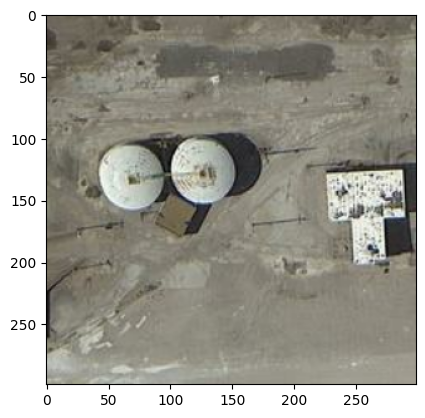

Predicted Caption:  two tanks are next to a piece of bare land


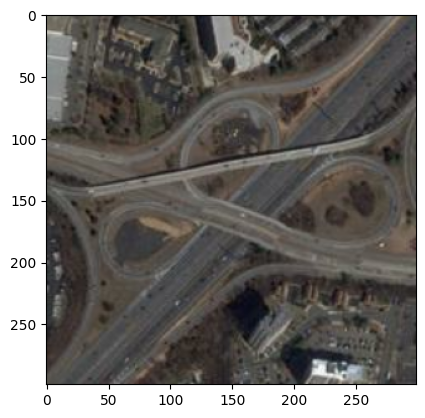

Predicted Caption:  many green trees and some buildings are close to a viaduct


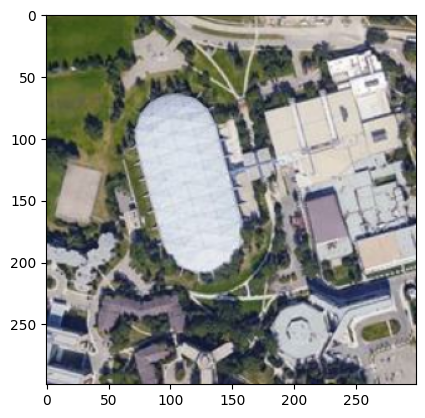

Predicted Caption:  a large building and some green trees are in a school


In [ ]:
vocab = vectorization.get_vocabulary()
index_lookup = dict(zip(range(len(vocab)), vocab))
max_decoded_sentence_length = SEQ_LENGTH - 1
valid_images = list((df_valid["filename"]))


def generate_caption():
    # Select a random image from the validation dataset
    sample_img = np.random.choice(valid_images)

    # Read the image from the disk
    sample_img = decode_and_resize(sample_img)
    img = sample_img.numpy().clip(0, 255).astype(np.uint8)
    plt.imshow(img)
    plt.show()

    # Pass the image to the CNN
    img = tf.expand_dims(sample_img, 0)
    img = caption_model.cnn_model(img)

    # Pass the image features to the Transformer encoder
    encoded_img = caption_model.encoder(img, training=False)

    # Generate the caption using the Transformer decoder
    decoded_caption = "<start> "
    for i in range(max_decoded_sentence_length):
        tokenized_caption = vectorization([decoded_caption])[:, :-1]
        mask = tf.math.not_equal(tokenized_caption, 0)
        predictions = caption_model.decoder(
            tokenized_caption, encoded_img, training=False, mask=mask
        )
        sampled_token_index = np.argmax(predictions[0, i, :])
        sampled_token = index_lookup[sampled_token_index]
        if sampled_token == "<end>":
            break
        decoded_caption += " " + sampled_token

    decoded_caption = decoded_caption.replace("<start> ", "")
    decoded_caption = decoded_caption.replace(" <end>", "").strip()
    print("Predicted Caption: ", decoded_caption)


# Check predictions for a few samples
generate_caption()
generate_caption()
generate_caption()

## End Notes

We saw that the model starts to generate reasonable captions after a few epochs. To keep
this example easily runnable, we have trained it with a few constraints, like a minimal
number of attention heads. To improve the predictions, you can try changing these training
settings and find a good model for your use case.